In [25]:
import pandas as pd
import numpy as np

In [26]:
dataset = "fraud_challenge_150k.csv"
df=pd.read_csv(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [27]:
#Inspect data
 # 0   account_age_days       [numerical]
 # 1   transaction_amt        [numerical]
 # 2   transaction_adj_amt    [numerical]
 # 3   historic_velocity      [numerical]
 # 4   ip_address             149873 non-null  object
 # 5   user_agent             149887 non-null  object
 # 6   email_domain           149910 non-null  object
 # 7   phone_number           149873 non-null  object
 # 8   billing_city           149884 non-null  object
 # 9   billing_postal         [numerical]
 # 10  billing_state          149887 non-null  object
 # 11  card_bin               [numerical]
 # 12  currency               149892 non-null  object
 # 13  cvv                    149877 non-null  object
 # 14  signature_image        149895 non-null  object
 # 15  transaction_type       149884 non-null  object
 # 16  transaction_env        149877 non-null  object
 # 17  EVENT_TIMESTAMP        149888 non-null  object
 # 18  applicant_name        149857 non-null  object
 # 19  billing_address        149866 non-null  object
 # 20  merchant_id            149893 non-null  object
 # 21  locale                 149866 non-null  object
 # 22  tranaction_initiate    149874 non-null  object
 # 23  days_since_last_logon  [numerical]
 # 24  inital_amount          [numerical]
 # 25  EVENT_LABEL            (0 = Legit, 1 = Fraud)  [numerical]
df.head(2)

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,12/29/2020 9:05,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,6/22/2021 18:05,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit


In [28]:
#Data Selection


#Dropping columns not needed
df = df.drop(columns=['applicant_name','billing_city','cvv','tranaction_initiate','billing_state','transaction_env','signature_image','transaction_type','billing_address','email_domain','user_agent','locale'], axis = 1)

#drop null values
# df.dropna(axis = 1)

df.head()



,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,phone_number,billing_postal,card_bin,currency,EVENT_TIMESTAMP,merchant_id,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,878-111-5140,96336.0,40771.0,cad,12/29/2020 9:05,066-82-8795,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,(002)736-0139,78083.0,24480.0,cad,6/22/2021 18:05,669-99-9459,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,(983)585-2863x652,83236.0,37778.0,cad,5/10/2021 13:48,086-41-1624,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,+1-678-897-3420x60738,78364.0,55790.0,usd,3/11/2021 7:36,669-97-4021,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,(013)204-1766x92641,77499.0,37370.0,cad,3/27/2021 6:13,088-21-6329,21.0,1905.0,legit


In [29]:
#Import ML Libraries
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost
import os

# !pip install xgboost
# !apt-get -qq install -y graphviz && pip install pydot

import graphviz

In [30]:
!pip install shap
import shap

In [31]:
df['EVENT_LABEL'].unique()

array(['legit', 'fraud'], dtype=object)

In [32]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'phone_number', 'billing_postal',
       'card_bin', 'currency', 'EVENT_TIMESTAMP', 'merchant_id',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

In [33]:
df['EVENT_LABEL'] = df['EVENT_LABEL'].map({'legit':0,'fraud':1})
# df['EVENT_LABEL'] = enc.fit_transform(df['EVENT_LABEL'])
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,phone_number,billing_postal,card_bin,currency,EVENT_TIMESTAMP,merchant_id,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,878-111-5140,96336.0,40771.0,cad,12/29/2020 9:05,066-82-8795,59.0,13646.0,0
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,(002)736-0139,78083.0,24480.0,cad,6/22/2021 18:05,669-99-9459,0.0,11930.0,0
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,(983)585-2863x652,83236.0,37778.0,cad,5/10/2021 13:48,086-41-1624,83.0,7412.0,0
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,+1-678-897-3420x60738,78364.0,55790.0,usd,3/11/2021 7:36,669-97-4021,24.0,4623.0,0
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,(013)204-1766x92641,77499.0,37370.0,cad,3/27/2021 6:13,088-21-6329,21.0,1905.0,0


In [34]:
# df.drop(['cvv','signature_image','transaction_type','transaction_env'],axis=1)

In [35]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'phone_number', 'billing_postal',
       'card_bin', 'currency', 'EVENT_TIMESTAMP', 'merchant_id',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

In [36]:
df['ip_address'] = df['ip_address'].fillna(0).replace({'\D':''},regex=True).astype(int)
df['ip_address']

0          1546849124
1          3913112585
2         16624519483
3          1001217216
4         11315665245
             ...     
149995      929851182
149996    13717200201
149997     9711159151
149998       88434052
149999    15725019213
Name: ip_address, Length: 150000, dtype: int64

In [37]:
df['merchant_id'] = df['merchant_id'].fillna(0).replace({'\D':''},regex=True).astype(int)
df['merchant_id']

0          66828795
1         669999459
2          86411624
3         669974021
4          88216329
            ...    
149995    330784517
149996    867314925
149997    120076784
149998    346526342
149999    319720066
Name: merchant_id, Length: 150000, dtype: int64

In [38]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'phone_number', 'billing_postal',
       'card_bin', 'currency', 'EVENT_TIMESTAMP', 'merchant_id',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

In [39]:
df['currency'].unique()

array(['cad', 'usd', 'eur', nan], dtype=object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             150000 non-null  int64  
 5   phone_number           149873 non-null  object 
 6   billing_postal         149876 non-null  float64
 7   card_bin               149872 non-null  float64
 8   currency               149892 non-null  object 
 9   EVENT_TIMESTAMP        149888 non-null  object 
 10  merchant_id            150000 non-null  int64  
 11  days_since_last_logon  149864 non-null  float64
 12  inital_amount          149872 non-null  float64
 13  EVENT_LABEL            150000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
m

In [41]:
df = pd.get_dummies(df, columns=['currency'])

In [42]:
# df = pd.get_dummies(df, columns=['phone_number'])
df['phone_number'] = df['phone_number'].fillna(0).replace({'\D':''},regex=True).astype(int)
df['phone_number']

0               8781115140
1                 27360139
2            9835852863652
3         1678897342060738
4           13204176692641
                ...       
149995          5540099294
149996       1754778512357
149997    1227374340852516
149998    1119602847945844
149999      69328857375001
Name: phone_number, Length: 150000, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             150000 non-null  int64  
 5   phone_number           150000 non-null  int64  
 6   billing_postal         149876 non-null  float64
 7   card_bin               149872 non-null  float64
 8   EVENT_TIMESTAMP        149888 non-null  object 
 9   merchant_id            150000 non-null  int64  
 10  days_since_last_logon  149864 non-null  float64
 11  inital_amount          149872 non-null  float64
 12  EVENT_LABEL            150000 non-null  int64  
 13  currency_cad           150000 non-null  uint8  
 14  currency_eur           150000 non-nu

In [44]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'phone_number', 'billing_postal',
       'card_bin', 'EVENT_TIMESTAMP', 'merchant_id', 'days_since_last_logon',
       'inital_amount', 'EVENT_LABEL', 'currency_cad', 'currency_eur',
       'currency_usd'],
      dtype='object')

In [45]:
df['year']=pd.to_datetime(df['EVENT_TIMESTAMP']).dt.year

In [46]:
df['month']=pd.to_datetime(df['EVENT_TIMESTAMP']).dt.month

In [47]:
df['day']=pd.to_datetime(df['EVENT_TIMESTAMP']).dt.day

In [48]:
df['hour']=pd.to_datetime(df['EVENT_TIMESTAMP']).dt.hour

In [49]:
df['minute']=pd.to_datetime(df['EVENT_TIMESTAMP']).dt.minute

In [50]:
df['second']=pd.to_datetime(df['EVENT_TIMESTAMP']).dt.second

In [51]:
# Delete the column
df.drop('EVENT_TIMESTAMP', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             150000 non-null  int64  
 5   phone_number           150000 non-null  int64  
 6   billing_postal         149876 non-null  float64
 7   card_bin               149872 non-null  float64
 8   merchant_id            150000 non-null  int64  
 9   days_since_last_logon  149864 non-null  float64
 10  inital_amount          149872 non-null  float64
 11  EVENT_LABEL            150000 non-null  int64  
 12  currency_cad           150000 non-null  uint8  
 13  currency_eur           150000 non-null  uint8  
 14  currency_usd           150000 non-nu

In [52]:
df.isna().sum()

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
ip_address                 0
phone_number               0
billing_postal           124
card_bin                 128
merchant_id                0
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
currency_cad               0
currency_eur               0
currency_usd               0
year                     112
month                    112
day                      112
hour                     112
minute                   112
second                   112
dtype: int64

In [53]:
df['year'] = df['year'].fillna(0).astype(int)

In [54]:
df['month'] = df['month'].fillna(0).astype(int)

In [55]:
df['day'] = df['day'].fillna(0).astype(int)

In [56]:
df['hour'] = df['hour'].fillna(0).astype(int)

In [57]:
df['minute'] = df['minute'].fillna(0).astype(int)

In [58]:
df['second'] = df['second'].fillna(0).astype(int)

In [59]:
df.isnull().sum()

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
ip_address                 0
phone_number               0
billing_postal           124
card_bin                 128
merchant_id                0
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
currency_cad               0
currency_eur               0
currency_usd               0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
dtype: int64

In [60]:
df['account_age_days'] = df['account_age_days'].fillna(0).astype(int)

In [61]:
df['account_age_days'].isna().sum()

0

In [62]:
df['transaction_amt'] = df['transaction_amt'].fillna(0).astype(int)

In [63]:
df['transaction_adj_amt'] = df['transaction_adj_amt'].fillna(0).astype(int)

In [64]:
df['historic_velocity'] = df['historic_velocity'].fillna(0).astype(int)

In [65]:
df['card_bin'] = df['card_bin'].fillna(0).astype(int)

In [66]:
df['inital_amount'] = df['inital_amount'].fillna(0).astype(int)

In [67]:
df.isnull().sum()

account_age_days           0
transaction_amt            0
transaction_adj_amt        0
historic_velocity          0
ip_address                 0
phone_number               0
billing_postal           124
card_bin                   0
merchant_id                0
days_since_last_logon    136
inital_amount              0
EVENT_LABEL                0
currency_cad               0
currency_eur               0
currency_usd               0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
dtype: int64

In [68]:
df['billing_postal'] = df['billing_postal'].fillna(0).astype(int)
df['days_since_last_logon'] = df['days_since_last_logon'].fillna(0).astype(int)
df.isnull().sum()

account_age_days         0
transaction_amt          0
transaction_adj_amt      0
historic_velocity        0
ip_address               0
phone_number             0
billing_postal           0
card_bin                 0
merchant_id              0
days_since_last_logon    0
inital_amount            0
EVENT_LABEL              0
currency_cad             0
currency_eur             0
currency_usd             0
year                     0
month                    0
day                      0
hour                     0
minute                   0
second                   0
dtype: int64

In [69]:
df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,phone_number,billing_postal,card_bin,merchant_id,days_since_last_logon,...,EVENT_LABEL,currency_cad,currency_eur,currency_usd,year,month,day,hour,minute,second
0,3371,2167,56,2572,1546849124,8781115140,96336,40771,66828795,59,...,0,1,0,0,2020,12,29,9,5,0
1,2714,2045,48,4517,3913112585,27360139,78083,24480,669999459,0,...,0,1,0,0,2021,6,22,18,5,0
2,6987,2892,61,5007,16624519483,9835852863652,83236,37778,86411624,83,...,0,1,0,0,2021,5,10,13,48,0
3,2712,3040,28,6022,1001217216,1678897342060738,78364,55790,669974021,24,...,0,0,0,1,2021,3,11,7,36,0
4,3598,2976,66,2600,11315665245,13204176692641,77499,37370,88216329,21,...,0,1,0,0,2021,3,27,6,13,0


In [70]:
df.isna().sum()

account_age_days         0
transaction_amt          0
transaction_adj_amt      0
historic_velocity        0
ip_address               0
phone_number             0
billing_postal           0
card_bin                 0
merchant_id              0
days_since_last_logon    0
inital_amount            0
EVENT_LABEL              0
currency_cad             0
currency_eur             0
currency_usd             0
year                     0
month                    0
day                      0
hour                     0
minute                   0
second                   0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   account_age_days       150000 non-null  int64
 1   transaction_amt        150000 non-null  int64
 2   transaction_adj_amt    150000 non-null  int64
 3   historic_velocity      150000 non-null  int64
 4   ip_address             150000 non-null  int64
 5   phone_number           150000 non-null  int64
 6   billing_postal         150000 non-null  int64
 7   card_bin               150000 non-null  int64
 8   merchant_id            150000 non-null  int64
 9   days_since_last_logon  150000 non-null  int64
 10  inital_amount          150000 non-null  int64
 11  EVENT_LABEL            150000 non-null  int64
 12  currency_cad           150000 non-null  uint8
 13  currency_eur           150000 non-null  uint8
 14  currency_usd           150000 non-null  uint8
 15  year             

In [72]:
y = df['EVENT_LABEL']

In [73]:
# x = df[['account_age_days', 'transaction_amt', 'transaction_adj_amt',
#        'historic_velocity', 'ip_address', 'card_bin', 'merchant_id',
#        'inital_amount','billing_postal','days_since_last_logon','year','month','day','minute','second']]
x = df.drop('EVENT_LABEL',axis=1)

In [74]:
df.head(2)

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,phone_number,billing_postal,card_bin,merchant_id,days_since_last_logon,...,EVENT_LABEL,currency_cad,currency_eur,currency_usd,year,month,day,hour,minute,second
0,3371,2167,56,2572,1546849124,8781115140,96336,40771,66828795,59,...,0,1,0,0,2020,12,29,9,5,0
1,2714,2045,48,4517,3913112585,27360139,78083,24480,669999459,0,...,0,1,0,0,2021,6,22,18,5,0


In [75]:
df.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'phone_number', 'billing_postal',
       'card_bin', 'merchant_id', 'days_since_last_logon', 'inital_amount',
       'EVENT_LABEL', 'currency_cad', 'currency_eur', 'currency_usd', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [76]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   account_age_days       150000 non-null  int64
 1   transaction_amt        150000 non-null  int64
 2   transaction_adj_amt    150000 non-null  int64
 3   historic_velocity      150000 non-null  int64
 4   ip_address             150000 non-null  int64
 5   phone_number           150000 non-null  int64
 6   billing_postal         150000 non-null  int64
 7   card_bin               150000 non-null  int64
 8   merchant_id            150000 non-null  int64
 9   days_since_last_logon  150000 non-null  int64
 10  inital_amount          150000 non-null  int64
 11  EVENT_LABEL            150000 non-null  int64
 12  currency_cad           150000 non-null  uint8
 13  currency_eur           150000 non-null  uint8
 14  currency_usd           150000 non-null  uint8
 15  year             

In [77]:
#Divide data to test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [78]:
# #Modelling
model = xgboost.XGBClassifier()
#from sklearn.model import
#model = xgboost.XGBRegressor(objective='reg:squarederror')
#eval_set = [(X_test, y_test)]  # Validation set
#model.fit(X_train, y_train, eval_metric=['mae', 'mse', 'rmse', 'rsquared'], eval_set=eval_set, verbose=False)


#Fit the model
model.fit(x_train,y_train)

# model.score(x_train,y_train)
# model.score(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
# Define the hyperparameters grid for tuning
param_grid = {
    'learning_rate': [0.2],
    'max_depth': [3],
    'subsample': [0.8],
    'n_estimators': [100,]
}



In [82]:
from sklearn.metrics import f1_score, r2_score,confusion_matrix,precision_score

In [83]:
y_prediction = model.predict(x_test)

In [84]:
f1_score(y_prediction,y_test)

0.6234058514628656

In [85]:
precision_score(y_prediction,y_test)

0.5232997481108312

In [86]:
from sklearn.metrics import confusion_matrix, recall_score

In [94]:
recall_score(y_prediction, y_test)

0.7708719851576994

In [95]:
cm = confusion_matrix(y_prediction, y_test)

In [89]:
cm

array([[28165,   757],
       [  247,   831]])

In [96]:
import shap

In [91]:
shap_tree = shap.TreeExplainer(model)

In [92]:
values = shap_tree.shap_values(x_test)

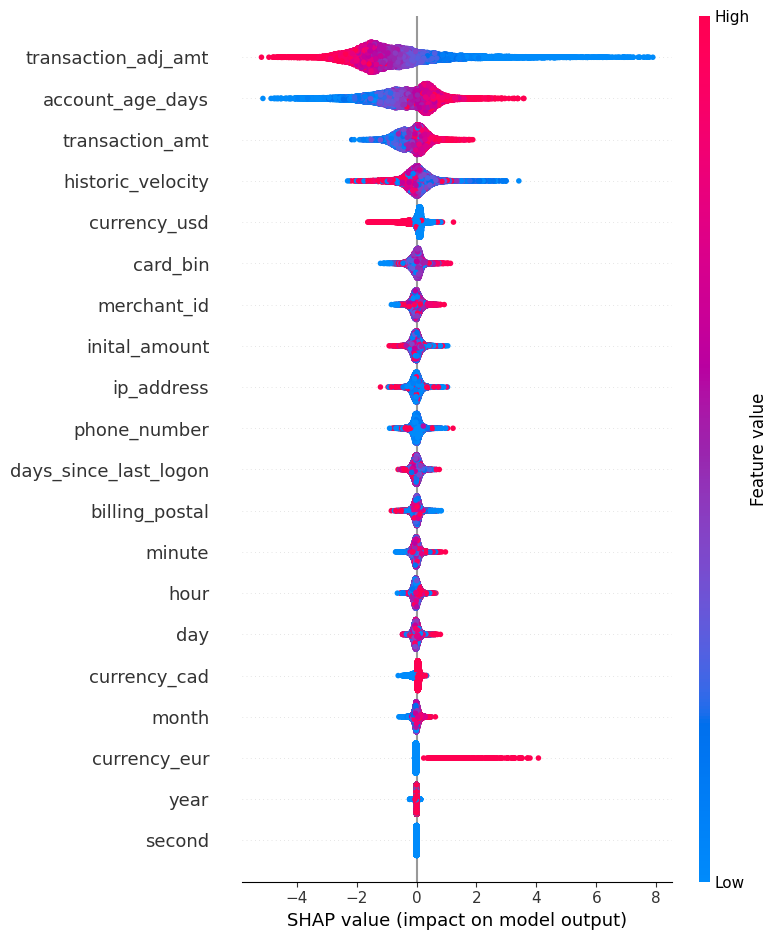

In [93]:
shap.summary_plot(values,x_test)